<a name='introduction'></a>
# Проект "Исследование объявлений о продаже квартир"

Предоставлен набор данных от Яндекс Практикума - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 
Необходимо установить параметры, влияющую на цену. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**План работы**:
1. [Импорт библиотек и данных](#import)
2. [Предобработка данных](#preprocessing)
    - ['cityCenters_km'](#cityCenters_km)
    - ['ceiling_height'](#ceiling_height)
    - ['living_area'](#living_area)
    - ['is_apartment'](#is_apartment)
    - ['kitchen_area'](#kitchen_area)
    - ['floors_total'](#floors_total)
    - ['balcony'](#balcony)
    - ['locality_name'](#locality_name)
    - ['days_exposition'](#days_exposition)
    - ['first_day_exposition'](#first_day_exposition)
    - ['parks_around3000'](#parks_around3000)
    - ['ponds_around3000'](#ponds_around3000)
    - ['last_price'](#last_price)
    - ['rooms'](#rooms)
3. [Feature Engineering](#feature_engineering)
4. [Исследовательский анализ данных](#eda)
5. [Исследования](#research)
    - [Исследование 1](#research_one)
    - [Исследование 2](#research_two)
    - [Исследование 3](#research_three)
6. [Общий вывод](#conclusion)

<a name='import'></a>
## 1. Импорт библиотек и данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Код ревьюра

try:
    data = pd.read_csv('/Users/midle/Desktop/Coding/DS+/П2/real_estate_data.csv', sep='\t')
except FileNotFoundError as e:
    print(repr(e))
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

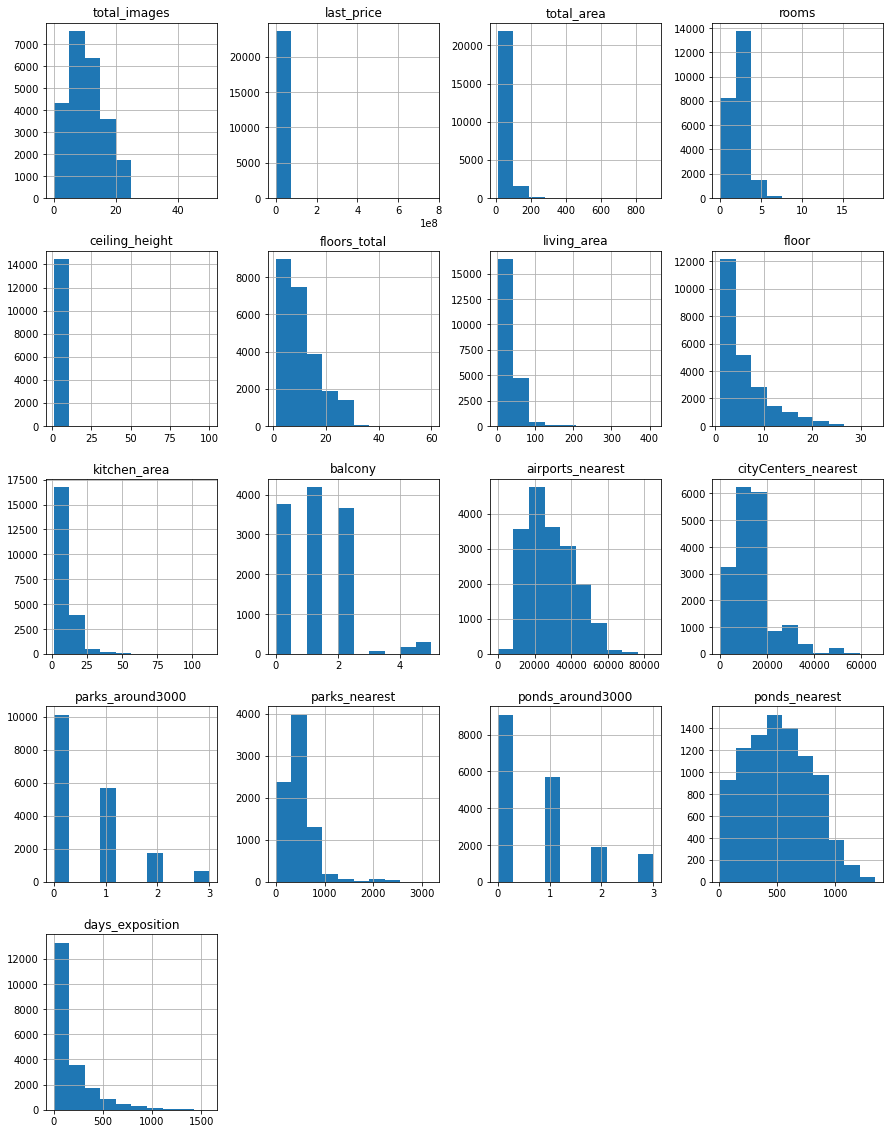

In [2]:
# Построение гистрограмм для всех столбцов таблицы

data.hist(figsize=(15, 20))
plt.show()

<a name='preprocessing'></a>
## 2. Предобработка данных
[Вернуться во Введение](#introduction)

In [3]:
# Просмотр категорий, по которым имеются пропущенные значения

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Общее количество строк - 23699. Количество категорий, где количество данных значений не соответствует общему объему данных, немало, следовательно, необходимо рассмотреть пропуски, по возможности, в каждой категории, где имеются пропущенные значения. Для начала рассмотрим явные пропуски в категориях по списку, представленном ниже. По ходу осуществления предобработки данных будут рассмотрены и устранены неявные дубликаты по различным столбцам, а также аномальные значения и изменены типы данных в соответствии с сущностью категории. 

Категорию 'days_exposition' стоит оставить с пропусками, так как они означают, что квартира еще не была продана.

Пропущенные данные по таким столбцам, как 'cityCenters_nearest' и 'ponds_nearest', следует оставить, поскольку нет информации и данных, по которым можно было бы их заполнить. Пропуски в данных столбцам могли возникнуть по той причине, что они не являются обязательными для заполнения пользователей для публикации своих объявлений о продаже объектов недвижимости. 

Необходимо провести предобработку данных по следующим категориям:
- [ а / з ] ceiling_height
- [ з / т ] floors_total
- [ o ] living_area
- [ o ] is_apartment
- [ o ] kitchen_area
- [ з / т ] balcony
- [ o / н ] locality_name
- [ o ] airports_nearest
- [ т ] last_price
- [ а ] rooms
- [ т ] first_day_exposition

Легенда:
* 'з' - заполнены пропуски
* 'о' - оставлено
* 'т' - тип данных изменен
* 'н' - неявные дубликаты устранены
* 'а' - аномальные значения устранены

Рассмотрим далее и обработаем каждый параметр, в отношении которого необходимо осуществить предобработку.

<a name='cityCenters_km'></a>
### 2. 1. 'cityCenters_km'

**Расстояние в км до центра города**

In [4]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()

data['cityCenters_km'] = data['cityCenters_km'].astype('Int64')
data[['cityCenters_nearest', 'cityCenters_km']].head()

,cityCenters_nearest,cityCenters_km
0,16028.0,16
1,18603.0,19
2,13933.0,14
3,6800.0,7
4,8098.0,8


<a name='ceiling_height'></a>
### 2. 2. 'ceiling_height'

In [5]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10 # Деление значений, которые больше 20м, на 10

# Демонстрация значений, которые больше 6м или меньше 2,5м
display(data.loc[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5)]) 

# Удаление строк со значениями с высотой потолка более 6м и менее 2,5м
data = data.drop(index=data.loc[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5)].index).reset_index(drop=True)

display("NaN до: {}".format(data['ceiling_height'].isna().sum()))


# Создание сводной таблицы с медианными значениями высоты потолка в зависимости от расстояния до центра города
centre_ceiling_df = data.pivot_table(index='cityCenters_km', values='ceiling_height', aggfunc='median')

# Заполнение пропущенных значениий высота потолка при наличии значения по показателю расстояния до центра города
for index, row in centre_ceiling_df.iterrows():
    data.loc[(data['ceiling_height'].isna()) & (data['cityCenters_km'] ==  index), 'ceiling_height'] = row['ceiling_height']
    
display("NaN после: {}".format(data['ceiling_height'].isna().sum()))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,NaN,...,1.0,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0,8
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0,<NA>
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,...,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,12
632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9.0,21.0,9,False,...,2.0,посёлок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.0,4,NaN,...,0.0,Санкт-Петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,10.00,5.0,14.0,5,True,...,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,8
22960,17,2300000.0,53.6,2018-10-18T00:00:00,2,2.00,2.0,19.0,1,NaN,...,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
23121,20,4290000.0,35.2,2018-09-12T00:00:00,1,2.47,14.0,20.0,7,NaN,...,1.0,Санкт-Петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0,13
23496,7,3300000.0,55.3,2018-06-19T00:00:00,2,2.45,14.0,31.0,2,False,...,3.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.0,<NA>


'NaN до: 9195'

'NaN после: 2578'

Для категории 'ceiling_height' имеется 9195 пропусков. Лучшим вариантов может быть использование медианного значения ависимости от расстояния до центра города для заполнения пропусков. 

Возьмем аномальные значения, когда высота потолка больше или равна 20м и разделим значение на 10. В дополнение, оставим значения, когда высота потолка находится в диапазоне от 2,5 до 6 метров. Остальные показатели необходимо удалить со сбросом индекса. После устранения аномально высоких значений приступим к замене пропущенных значений на рассчитанное медианное значение.

Помимо устранения крайне высоких значений стоит также обратить внимание и на низкие значения. Минимальная высота потолка в базе данных без предобработки составляет 1 метр. Однако, минимальная возможная высота жилого помещения согласно СНиП 31-01-2003 составляет не менее 2,5. Следовательно, от тех значений, когда высота потолка ниже данного минимума необходимо избавиться. 

<a name='living_area'></a>
### 2. 3. 'living_area'

In [7]:
display("NaN: {}".format(data['living_area'].isna().sum()))

# Разброс цен по пропущенный значениям по категории 'living_area'

data[data['living_area'].isna()].sort_values(by='last_price', ascending=False)['last_price']

'NaN: 1864'

5850     230000000.0
14909    150000000.0
12582    140000000.0
3096     140000000.0
2227     130278280.0
            ...     
6808        490000.0
21759       470000.0
16106       450000.0
16160       440000.0
14804       430000.0
Name: last_price, Length: 1864, dtype: float64

Также имеются пропущенные значения и по столбцу 'living_area'. Важно отметить тот факт, что использование медианных или средних значений вместо пропусков может сильно исказить конечные выводы, а так как большая часть информации по другим категориям в данных имеется, следовательно, избавляться от строк с данными пропусками не стоит. Также, стоит учесть и тот факт, что разница в стоимости на жилье различна, следовательно, усреднение значений и замена пропущенных значений на усредненные может исказить результаты исследования.

По диаграмме рассеяния видно, что верхний межквартильный размах заканчивается примерно на 80 м2, поэтому удалим значения, которые превышают данный показатель.

<a name='is_apartment'></a>
### 2. 4. 'is_apartment'

In [8]:
display("True: {}".format(data[data['is_apartment'] == True]['is_apartment'].count()))
display("False: {}".format(data[data['is_apartment'] == False]['is_apartment'].count()))
display("NaN: {}".format(data['is_apartment'].isna().sum()))

'True: 48'

'False: 2712'

'NaN: 20770'

Стоит обратить внимание на категорию 'is_apartment'. Количество значений 'True' для данной категории составляет всего 48, в то время как значений 'False' составляет 2712. Сложно точно сказать, с чем связано наличие большого количества пропусков, поэтому и заполнение данной категории заранее установленным значением - False и True - не представляется возможным. Вероятно, в данной ситуации целесообразно обратиться к специалистам по сбору информации с вопросом о том, почему имеется такое большое количество пропусков и являются ли пропущенные значения фактом того, что эти квартиры "не являются апартаментами"?

Возникновение пропущенных значений в данной категории может быть связано с необязательностью их заполнения при  продаже недвижимости, либо же при ошибке введения информации в саму базу данных.

<a name='kitchen_area'></a>
### 2. 5. 'kitchen_area'

In [9]:
# Подсчет количества пропущенных значений, а также топ-20 объектов недвижимости с пропусками в столбце 'kitchen_area'

display("NaN: {}".format(data['kitchen_area'].isna().sum()))

display(f"Корреляция 'kitchen_area' и 'last_price': {data['kitchen_area'].corr(data['last_price'])}")
display(f"Корреляция 'total_area' и 'kitchen_area': {data['total_area'].corr(data['kitchen_area'])}")

'NaN: 2222'

"Корреляция 'kitchen_area' и 'last_price': 0.5199485264517055"

"Корреляция 'total_area' и 'kitchen_area': 0.6093464873991452"

Далее рассмотрим пропущенные значения по категории "kitchen_area". По проведенным далее расчетам и наблюдениям - сложно выявить корреляцию между, например, ценой и наличием пропущенных значений, а поскольку пропущенные значения, как показано по расчетам далее, имеются для объектов недвижимости как дорогих, так и более экономных, следовательно, использование среднего или медианного значения не представляется благоразумным вариантом. 

В дополнение, из-за небольшой корреляции таких категорий как "общей площади" и "цены на моментс снятия с публикации" ('total_area' & 'last_price') расчет площади кухни в соответствии с ранее упомянутыми параметрами также не представляется возможным. Можно сделать вывод, что пропущенные значения пока что стоит оставить по категории "kitchen_area".

<a name='floors_total'></a>
### 2. 6. 'floors_total'

In [6]:
display("NaN до: {}".format(data['floors_total'].isna().sum()))

data = data.drop(index=data[data['floors_total'].isna()].index).reset_index(drop=True)

display("NaN после: {}".format(data['floors_total'].isna().sum()))

# Перевод значений категории 'floors_total' в тип данных 'int64'
data['floors_total'] = data['floors_total'].astype('int64')

'NaN до: 86'

'NaN после: 0'

Есть сомнения в целесообразности в расчете медианных или средних значений для заполнения пропущенных значений в категории 'floors_total', поскольку количество этажей может сильно разниться, и сложно выделить определенную закономерность. Тем более, что разброс значений по категории составляет от 1 до 60 этажей. В дополнение, количество пропусков составляет всего 86 позиций, что равняется менее 0,4%. Следовательно, позиции с отсутствующими значениями можно удалить, так как они слабо повлияют на последующие выводы исследования.

Вдобавок, переведем значения в рассматриваемом столбце в тип данных "int64", поскольку значения количества этаже не может быть вещественным.

<a name='balcony'></a>
### 2. 7. 'balcony'

In [10]:
display("NaN до: {}".format(data['balcony'].isna().sum()))
data['balcony'] = data['balcony'].fillna(0)
display("NaN после: {}".format(data['balcony'].isna().sum()))
data['balcony'] = data['balcony'].astype('int64')

'NaN до: 11446'

'NaN после: 0'

Предполагается, что пропущенные значения в столбце 'balcony' могут быть связаны с тем, что пользователи при объявлении о продаже объекта недвижимости не указывают никакой информации о количестве балконов, так как они отсутствуют, следовательно, можно заменить пропущенные значения на '0'.

В дополнение, поменяем также тип данных рассматриваемого столбца на 'Int64', поскольку значение количества балконов не может быть вещественным.

<a name='locality_name'></a>
### 2. 8. 'locality_name'

In [11]:
display("NaN до: {}".format(data['locality_name'].isna().sum()))
data = data.drop(index=data.loc[data['locality_name'].isna()].index)
display("NaN после: {}".format(data['locality_name'].isna().sum()))

display("Кол-во уникальных значений до: {}".format(data['locality_name'].nunique()))

data['locality_name'] = data['locality_name'].replace({"посёлок": "поселок"}, regex=True)
data['locality_name'] = data['locality_name'].replace({"поселок при железнодорожной станции ": "", "поселок станции ": "", \
                                                       "поселок городского типа имени ": "", "городской поселок ": "", \
                                                       "поселок городского типа ": "", "коттеджный поселок ": "", \
                                                       "садоводческое некоммерческое товарищество ": "", \
                                                       'поселок ': '', "деревня ": "", "садовое товарищество ": "", \
                                                       "село ": ""}, \
                                                      regex=True)
display("Кол-во уникальных значений после: {}".format(data['locality_name'].nunique()))
data['locality_name'].unique()

'NaN до: 48'

'NaN после: 0'

'Кол-во уникальных значений до: 363'

'Кол-во уникальных значений после: 304'

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Количество пропущенных значений по столбцу 'locality_name' составляет всего 48 строк, что составляет около 0.02% от общего числа объектов недвижимости. Можно смело заявить, что неучет данных пропусков не приведет к искажению последующих выводов. Следовательно, данные объекты можно удалить. 

Возможными причинами пропусков значений могут являться ошибки со стороны составителей базы данных либо отсутствием подобной информации об объекте недвижимости от самого пользователя.

Можем сразу разобраться с неявными дубликатами. Найдем и рассмотрим наименования, которые могут почти полностью совпадать и являться неявными дубликатами. С целью уменьшения количества дубликатов и сокращения времени на рассмотрение каждого значения в значениях оставим лишь названия населенных пунктов, например, вместо "поселок Мурино" только "Мурино" и так далее. Ниже с помощью подобных замен количество уникальных значений удалось значительно сократить.

<a name='days_exposition'></a>
### 2. 9. 'days_exposition'

Изменим тип данных для столбца 'days_exposition'. Помимо изменения типа данных с 'float64' на 'Int64' необходимо первоначально округлить значения до нуля знаков после запятой для устранения неправильно введенных значений.

In [12]:
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [13]:
# Код ревьюера

import numpy as np

df_demo = pd.DataFrame({'col_1' : [1,2,4,np.nan], 'col_2' : [10,20,40,50]}).astype({'col_1' : 'Int64', 'col_2' : 'int'})

try:
    df_demo[['col_1']].corrwith(df_demo['col_2'])
except Exception as e:
    print(repr(e))
    
df_demo = df_demo.astype({'col_1' : 'float'})

df_demo[['col_1']].corrwith(df_demo['col_2'])

AttributeError("'float' object has no attribute 'shape'")


col_1    1.0
dtype: float64

<a name='first_day_exposition'></a>
### 2. 10. 'first_day_exposition'

В данном столбце отсутствуют пропущенные значения, однако необходимо изменить типа данных на 'datetime' вместо 'object'. Стоит отметить, что время публикации объявление постоянно равно 00:00:00, следовательно, вторую часть в значениях с точным временм можно отбросить и оставить только дату публикации объявлений о продаже объектов недвижимости.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%d")

<a name='parks_around3000'></a>
### 2. 11. 'parks_around3000'

В случае, если количество парков в радиусе 3 км не указано, логично было бы предположить, что парки по близости отсутствуют. Следовательно, необходимо заменить пропущенные значения парков на "0".

In [15]:
display("NaN до: {}".format(data['parks_around3000'].isna().sum()))
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int64')
display("NaN после: {}".format(data['parks_around3000'].isna().sum()))

'NaN до: 5468'

'NaN после: 0'

<a name='ponds_around3000'></a>
### 2. 12. 'ponds_around3000'

В случае, если количество водоемов в радиусе 3 км не указано, логично было бы предположить, что парки по близости отсутствуют. Следовательно, необходимо заменить пропущенные значения парков на "0".

In [16]:
display("NaN: {}".format(data['ponds_around3000'].isna().sum()))
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int64')
display("NaN после: {}".format(data['parks_around3000'].isna().sum()))

'NaN: 5468'

'NaN после: 0'

<a name='last_price'></a>
### 2. 13. 'last_price'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km
12877,19,763000000.0,400.0,2017-09-30,7,3.050,10,250.0,10,NaN,...,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33,4
19402,8,420000000.0,900.0,2017-12-06,12,2.800,25,409.7,25,NaN,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,8
14600,15,401300000.0,401.0,2016-02-20,5,3.200,9,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393,2
1425,19,330000000.0,190.0,2018-04-04,3,3.500,7,95.0,5,NaN,...,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233,1
15541,20,300000000.0,618.0,2017-12-18,7,3.400,7,258.0,5,NaN,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111,5
22669,18,289238400.0,187.5,2019-03-19,2,3.370,6,63.7,6,NaN,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,<NA>,1
16346,17,245000000.0,285.7,2017-04-10,6,3.350,7,182.8,4,NaN,...,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249,6
13651,7,240000000.0,410.0,2017-04-01,6,3.400,7,218.0,7,NaN,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199,5
5850,3,230000000.0,500.0,2017-05-31,6,3.000,7,NaN,7,NaN,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50,5
8841,13,190870000.0,268.0,2016-03-25,3,3.000,8,132.0,7,NaN,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901,5


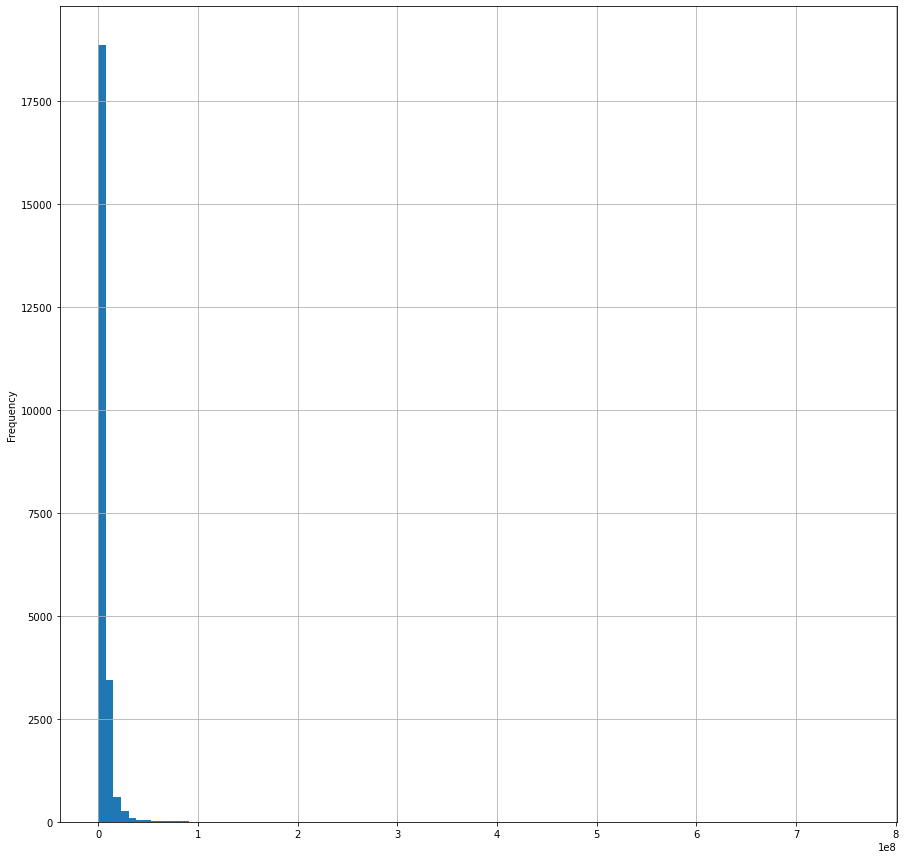

In [17]:
display(data.sort_values(by='last_price', ascending=False).head(20))

data['last_price'].plot(kind='hist', bins=100, figsize=(15, 15), grid=True)

data = data.drop(index=data[(data['last_price'] > 30000000) | (data['last_price'] < 400000)].index).reset_index(drop=True)

data['last_price'] = data['last_price'].astype('int64')

Стоит рассмотреть некоторые из наиболее высоких показателей по данной категории и проанализировать некоторые из показателей данных объектов. Можно заметить, что общая площадь первого объекта составляет 400 метров, в то время как второго - 900, хотя цена первого составляет 763 млн, а второго - 420 млн. Это лишь первые два примера, таким же образом можно проанализировать объекты и далее по списку. Вследствие этого лучше взять более репрезентативную выборку, то есть уменьшить количество крайне высоких значений по данной категории. Оптимальное значение максимальной цены для объекты в выборке лучше взять по гистограмме. Исходя из нее, лучше взять максимальное значение в районе 30 млн, а остальные объекты, стоимость которых выше данного значения, удалить.

В дополнение, необходимо изменить тип данных для данного столбца с 'float64' на 'int64', а также удалить аномально низкое значение цены объекта в 12190 рублей.

<a name='rooms'></a>
### 2. 14. 'rooms'

Категория 'rooms' - количество комнат - подразумевает, что значение должно быть по меньшей мере "1". Следовательно, необходимо избавиться от объектах недвижимости, количество комнат которых равно 0.

In [18]:
data.loc[((data['studio']) | (data['open_plan'])) & (data['rooms'] == 0), 'rooms'] = 1

In [19]:
# Проверка типа данных, а также количества пропущенных значений по всем столбцам датафрейма 'data'

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23166 entries, 0 to 23165
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23166 non-null  int64         
 1   last_price            23166 non-null  int64         
 2   total_area            23166 non-null  float64       
 3   first_day_exposition  23166 non-null  datetime64[ns]
 4   rooms                 23166 non-null  int64         
 5   ceiling_height        20606 non-null  float64       
 6   floors_total          23166 non-null  int64         
 7   living_area           21344 non-null  float64       
 8   floor                 23166 non-null  int64         
 9   is_apartment          2710 non-null   object        
 10  studio                23166 non-null  bool          
 11  open_plan             23166 non-null  bool          
 12  kitchen_area          20987 non-null  float64       
 13  balcony         

<a name='feature_engineering'></a>
## 3. Feature Engineering
[Вернуться во Введение](#introduction)

**Цена за 1 квадратный метр**

Определим цену за один квадратный метр, а также округлим значения и перевед столбец в тип данных 'int64'.

In [20]:
data['meter_price'] = (data['last_price'] / data['total_area']).round().astype('int64')
data['meter_price'].head()

0    120370
1     82921
2     92786
3    100000
4     95066
Name: meter_price, dtype: int64

**День недели публикации объявления**

In [21]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data[['first_day_exposition', 'day_of_week']].head()

,first_day_exposition,day_of_week
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2018-06-19,1
4,2018-09-10,0


**Месяц публикации объявления**

In [22]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data[['first_day_exposition', 'month_exposition']].head()

,first_day_exposition,month_exposition
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2018-06-19,6
4,2018-09-10,9


**Год публикации объявления**

In [23]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'year_exposition']].head()

,first_day_exposition,year_exposition
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2018-06-19,2018
4,2018-09-10,2018


**Тип этажа квартиры (первый, последний, другой)**

С помощью отдельной функции, а также применения метода apply(), добавим отдельный столбец с типом этажа квартиры.

In [24]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)
data[['floors_total', 'floor', 'floor_type']].head(15)

,floors_total,floor,floor_type
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,13,другой
4,12,5,другой
5,26,6,другой
6,24,22,другой
7,27,26,другой
8,9,7,другой
9,12,3,другой


**Расстояние в км до центра города**

In [25]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()
data[['cityCenters_nearest', 'cityCenters_km']].head()

,cityCenters_nearest,cityCenters_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,8098.0,8.0
4,NaN,NaN


<a name='eda'></a>
## 4. Исследовательский анализ данных
[Вернуться во Введение](#introduction)

**Категория "общая площадь" ('total_area')**

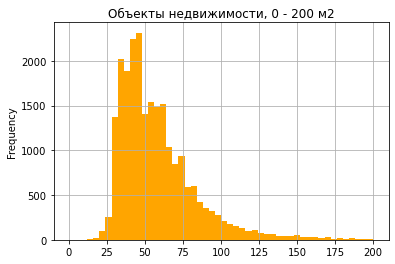

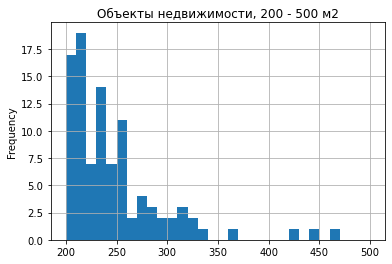

'Кол-во объектов с площадью до 25 м2: 185'

'Кол-во объектов с площадью 25-50 м2: 10930'

'Кол-во объектов с площадью 51-75 м2: 7794'

'Кол-во объектов с площадью более 200 м2: 95'

In [26]:
data['total_area'].plot(kind='hist', 
                        bins=50,
                        range=(0, 200), 
                        grid=True, 
                        color='orange', 
                        title='Объекты недвижимости, 0 - 200 м2')
plt.show()
data['total_area'].plot(kind='hist', 
                        bins=30,
                        grid=True, 
                        range=(200, 500),
                        title='Объекты недвижимости, 200 - 500 м2')
plt.show()
display(f"Кол-во объектов с площадью до 25 м2: {data[data['total_area'] < 25]['total_area'].count()}")
display(f"Кол-во объектов с площадью 25-50 м2: {data.loc[(data['total_area'] >= 25) & (data['total_area'] <= 50)]['total_area'].count()}")
display(f"Кол-во объектов с площадью 51-75 м2: {data.loc[(data['total_area'] > 50) & (data['total_area'] <= 75)]['total_area'].count()}")
display(f"Кол-во объектов с площадью более 200 м2: {data[data['total_area'] > 200]['total_area'].count()}")

Для наглядной демонстрации было взято 2 графика. Первый график - "Объекты недвижимости, 0 - 200 м2", второй - "Объекты недвижимости, 200 - 550 м2". В дополнение также выведено на экран число объектов недвижимости. Графики похожи на распределение Пуассона, поскольку на первом графике имеется пик в районе до 50 квадратных метров, который далее стремится к нулю по мере увеличения общей площади квартиры, а на втором - пик на отметке в 200 м2. 

Наибольшее количество выставленных на продажу объектов недвижимости имеет общую площадь от 25 до 50 квадратных метров. На данный промежуток приходится порядка 47% от общего числа. На последующие 25 метров - от 50 до 75 - число объектов недвижимости составляет около 34% от общего числа. Таким образом на промежуток между 25 и 75 метрами приходится около 81% от общего числа объектов недвижимости. 

**Категория "жилая площадь" ('living_area')**

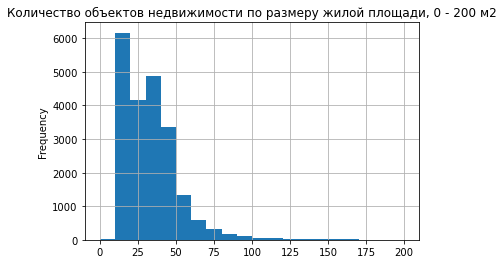

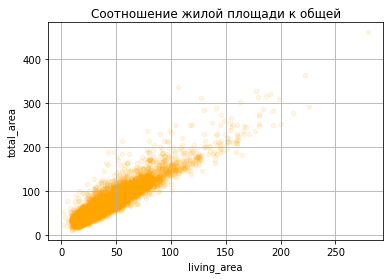

"Коэффициент корреляции между 'living_area' и 'total_area': 0.932631810512168"

In [27]:
data['living_area'].plot(kind='hist', 
                         range=(0, 200),
                         bins=20,
                         grid=True,
                         title="Количество объектов недвижимости по размеру жилой площади, 0 - 200 м2")
plt.show()
data.plot(kind='scatter',
          x='living_area',
          y='total_area',
          alpha=0.1,
          grid=True,
          color='orange',
          title='Соотношение жилой площади к общей') 
plt.show()

display(f"Коэффициент корреляции между 'living_area' и 'total_area': {data['total_area'].corr(data['living_area'])}")

На экран выведено два графика: "Количество объектов недвижимости по размеру жилой площади, 0 - 200 м2" и "Соотношение жилой площади к общей".

Промежуток, взятый для первого графика равен от 0 до 200 м2, поскольку график представляет собой распределение Пуассона, и количество объектов недвижимости по размеру жилой площади будет уменьшаться.

С помощью построения диаграммы рассеяния, а также нахождения коэффициента корреляция, который составляет 0.94, можно сделать вывод о том, что между категориями 'living_area' и 'total_area' имеется сильная зависимость.

**Категория "площадь кухни" ('kitchen_area')**

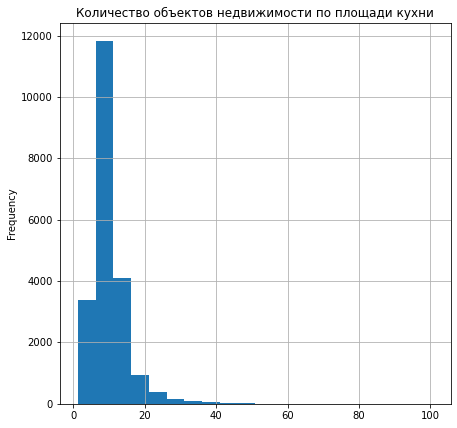

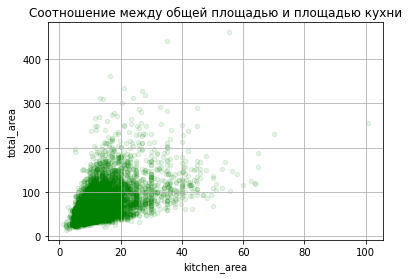

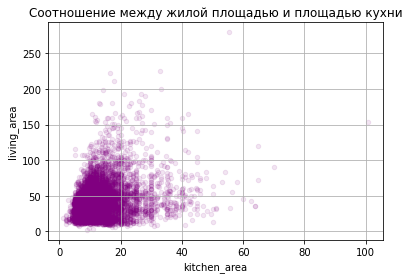

'Коэффициент корреляции между площадью кухни и общей площадью: 0.5614646536822049'

'Коэффициент корреляции между площадью кухни и жилой площадью: 0.3463457575943122'

In [28]:
data['kitchen_area'].plot(kind='hist', 
                          grid=True,
                          bins=20, figsize=(7, 7),
                          title='Количество объектов недвижимости по площади кухни')
plt.show()
data.plot(kind='scatter',
          x='kitchen_area',
          y='total_area',
          alpha=0.1,
          grid=True,
          color='green',
          title='Соотношение между общей площадью и площадью кухни')
plt.show()
data.plot(kind='scatter',
          x='kitchen_area',
          y='living_area',
          alpha=0.1,
          grid=True,
          color='purple',
          title='Соотношение между жилой площадью и площадью кухни')
plt.show()

display("Коэффициент корреляции между площадью кухни и общей площадью: {}".format(data['kitchen_area'].corr(data['total_area'])))
display("Коэффициент корреляции между площадью кухни и жилой площадью: {}".format(data['kitchen_area'].corr(data['living_area'])))

На экран выведено 3 графика: 'Количество объектов недвижимости по площади кухни', 'Соотношение между общей площадью и площадью кухни' и 'Соотношение между жилой площадью и площадью кухни'. Первый график представляет собой распределение Пуассона и с увеличением площади кухни уменьшается количество таких объектов недвижимости.

С целью подтверждения или опровержения двух вышеупомянутых гипотез были построены два графика: 'Соотношение между общей площадью и площадью кухни' и 'Соотношение между жилой площадью и площадью кухни', а также найдены коэффициенты корреляции между 1) площадью кухни и общей площадью, а также 2) площадью кухни и жилой площадью. Согласно расчетам, коэффициент корреляции в первом случае составляет 0.56, что говорит об умеренном характере зависимости, однако, разброс значений все же имеется; во втором cлучае - 0,35, что говорит лишь о слабой зависимости между двумя величинами - площадью кухни и жилой площадью.

**Категория 'цена объекта' ('last_price')**

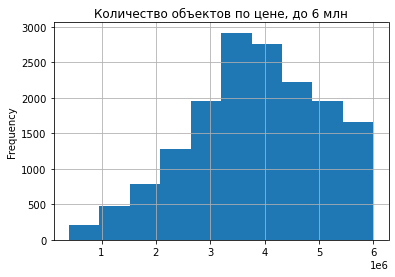

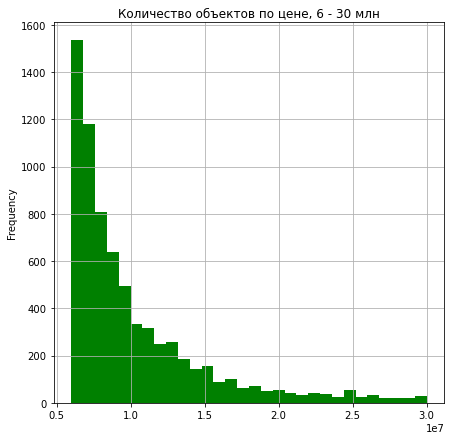

'Количество объектов ценой до 6 млн: 16218'

'Количество объектов ценой от 6 до 30 млн: 6948'

In [29]:
data['last_price'].plot(kind='hist', 
                        grid=True,
                        range=(400000, 6000000), 
                        bins=10,
                        title='Количество объектов по цене, до 6 млн')
plt.show()
data['last_price'].plot(kind='hist', 
                        grid=True,
                        range=(6000000, 30000000), 
                        bins=30, 
                        figsize=(7, 7),
                        color='green',
                        title='Количество объектов по цене, 6 - 30 млн')
plt.show()

display("Количество объектов ценой до 6 млн: {}".format(data[data['last_price'] <= 6000000]['last_price'].count()))
display("Количество объектов ценой от 6 до 30 млн: {}".format(data.loc[(data['last_price'] > 6000000) & (data['last_price'] <= 30000000)]['last_price'].count()))

Поскольку изучение цены и влияние на нее различных факторов (других категорий) является одной из последующих частей данного исследования, следовательно, здесь опишу лишь общие подмеченные факты с помощью выведенных на экран гистограмм.

Для более наглядной демонстрации было выведено 2 графика на экран: 'Количество объектов по цене, 0,4 - 6 млн', 'Количество объектов по цене, 0 - 30 млн'. Пик значений приходится на цену в диапазоне от 3,5 до 4,5 млн рублей. Стоит отметить, что количество предложений предложений о продаже недвижимости ценой до 6ф млн рублей составляет 16030 (69,8% общего количества). Количество же объектов ценой от 6 до 30 млн рублей - 6943 (30,2%). Можно сделать вывод о том, что дорогая недвижимость (более 6 млн рублей) пользуется меньшим спросом, чем относительно недорогая (до 6 млн рублей).

**Категория "количество комнат" ('rooms')**

1     8166
2     7839
3     5664
4     1098
5      265
6       77
7       38
8        7
9        6
10       2
14       2
16       1
11       1
Name: rooms, dtype: int64

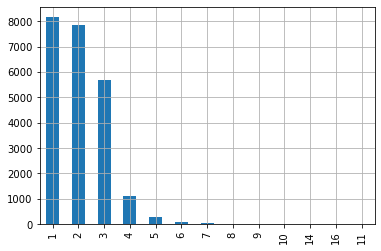

In [30]:
display(data['rooms'].value_counts())
data['rooms'].value_counts().plot.bar(grid=True)
plt.show()

Выведен барчарт по количеству комнат. Видно уменьшение количество объектов недвижимости по мере увеличения количества комнат (обратная зависимость).

Количество квартир с 8 и более комнатами исчисляются единицами. Максимальным значением является 16 комнат в одной квартире. 

**Категория "высота потолков" ('ceiling_height')**

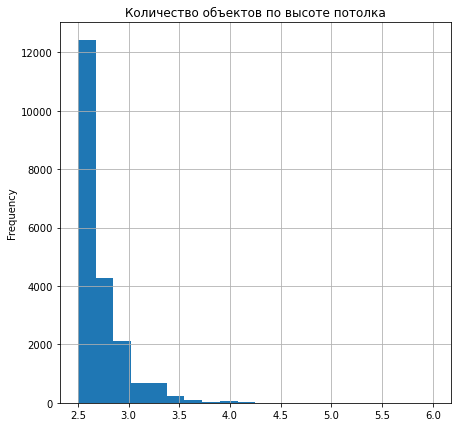

In [31]:
data['ceiling_height'].plot(kind='hist',
                            range=(2.5, 6),
                            bins=20,
                            figsize=(7, 7),
                            grid=True,
                            title='Количество объектов по высоте потолка')
plt.show()

Распределение Пуассана также видно и на графике 'ceiling_height'. Необходимо напомнить, что значения, превышающие 6м, а также меньше, чем 2,5м, были ранее удалены в ходе этапа предобработки данных, поскольку количество таких объектов крайне мало, а сильно разрозненные высокие и низкие значения могут в итоге повлиять на конечные выводы исследования.

На графике можно увидеть, что высота потолка у большинства объектов недвижимости находится в диапазоне 2,5 - 3,5 метров. 

**Категория "этаж квартиры" ('floor')**

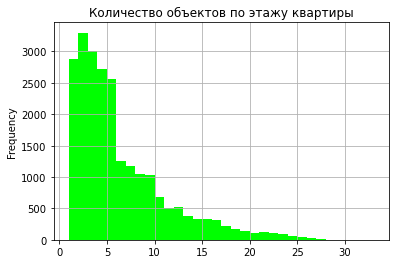

In [32]:
data['floor'].plot(kind='hist', 
                   color='lime',
                   grid=True, 
                   title='Количество объектов по этажу квартиры',
                   bins=32)
plt.show()

На гистограмме можно заметить, что большинство значений приходится на первые 10 этажей. Это может быть связано с тем, что маленькое количество домой имеет большое количество этажей (далее имеется отдельная гистограмма по общему количеству этажей в доме). Чем выше этаж, тем меньше объектов недвижимости находятся на продаже, но данный вывод не работает в отношении 2 и 3 этажа, на которые приходится больше объектов, чем на первый этаж - это соответствует распределению Пуассона, следовательно, сильно разрозненных значений (выбросов) нет.

**Категория "тип этажа квартиры" ('floor_type')**

<AxesSubplot:>

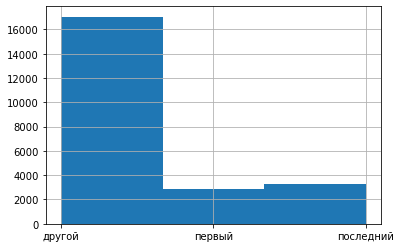

In [33]:
data['floor_type'].hist(bins=3)

Поскольку на первый этаж, как и последний, в здании может быть только один, то логично, что у большинства квартир тип этажа относится к категории "другой". Примечательно, однако, что количество объектов недвижимости на последнем этаже слегка больше, чем на первом.

**Категория "общее количество этажей в доме" ('floors_total')**

<AxesSubplot:ylabel='Frequency'>

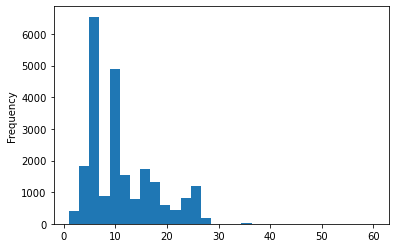

In [34]:
data['floors_total'].plot(kind='hist', bins=30)

На гистограмме отчетливо видно пики на значениях "5" и "9". Причиной этого может служить обычаи в строительстве касательно возведения здания с таким количеством этажей. Отдельные значения появляются чаще других (около 15 и 26 этажей). Максимальное значение количества этажей в дома достигает 60, но самый высокий этаж, на котором продается квартира - 33.

**Категория "расстояние до центра города в метрах" ('cityCenters_nearest')**

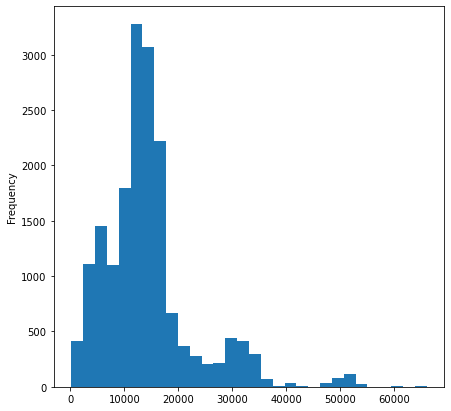

'Кол-во объектов в близи центра (до 10 000м): 4755'

'Кол-во объектов подальше (от 10 000м до 20 000м): 10354'

'Кол-во объектов в дали центра (более 10 000м): 2597'

'Общее число значений: 17706'

In [35]:
data['cityCenters_nearest'].plot(kind='hist', bins=30, figsize=(7, 7))
plt.show()

display("Кол-во объектов в близи центра (до 10 000м): {}".format(data[data['cityCenters_nearest'] < 10000]['cityCenters_nearest'].count()))
display("Кол-во объектов подальше (от 10 000м до 20 000м): {}".format(data.loc[(data['cityCenters_nearest'] >= 10000) & (data['cityCenters_nearest'] <= 20000)]['cityCenters_nearest'].count()))
display("Кол-во объектов в дали центра (более 10 000м): {}".format(data[data['cityCenters_nearest'] > 20000]['cityCenters_nearest'].count()))
display("Общее число значений: {}".format(data['cityCenters_nearest'].count()))

График напоминает распределение Пуассона. Большое количество объектов недвижимости располагается в 10 000 - 20 000 м от центра города. Так количество объектов вблизи центра города (до 10 000м) составляет 4729, а немного дальше (от 10 000м до 20 000м) - 10273. Отдельные объекты находится и дальше этого диапазона. Их число составляет 2588. Примечательно, что не по всем объекта имеется информация по данной категории, поэтому общее количество заполненных значений по данному столбцу составляет 17590.

#### **Категория "расстояние до ближайшего аэропорта" ('airports_nearest')**

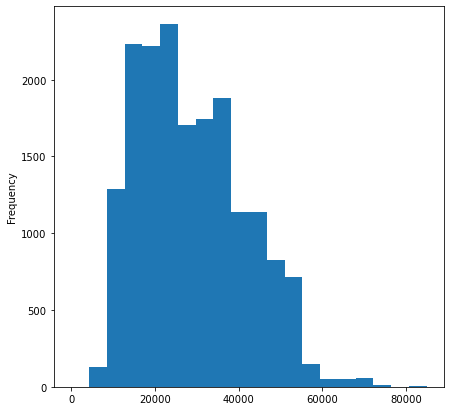

'Кол-во объектов вблизи аэропорта (до 15 000м): 2710'

'Кол-во объектов в диапазоне от 15 000м до 40 000м: 11428'

'Общее число значений: 17686'

In [36]:
data['airports_nearest'].plot(kind='hist', bins=20, figsize=(7, 7))
plt.show()

display("Кол-во объектов вблизи аэропорта (до 15 000м): {}".format(data[data['airports_nearest'] < 15000]['airports_nearest'].count()))
display("Кол-во объектов в диапазоне от 15 000м до 40 000м: {}".format(data.loc[(data['airports_nearest'] >= 15000) & (data['airports_nearest'] <= 40000)]['airports_nearest'].count()))
display("Общее число значений: {}".format(data['airports_nearest'].count()))

Если большинство объектов для категории "расстояние до центра города в метрах" приходится на значения от 10 000м до 20 000м, то в случае со столбцом "расстояние до ближайшего аэропорта" ситуация немного иная. Пиковые значения в данном случае приходятся на промежуток от 15 000м до 40 000м - таких объектов 11361. Объектов вблизи аэропорта (до 50 000м) составляет 2679. Необходимо также учитывать, что общее количество объектов с указанным расстоянием до ближайшего аэропорта является 17570.

**Категория "расстояние до ближайшего парка" ('parks_nearest')**

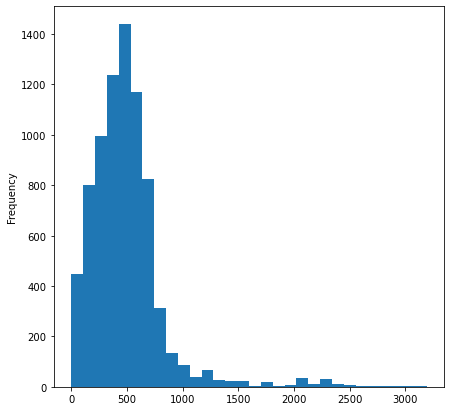

'Общее число значений: 7768'

In [37]:
data['parks_nearest'].plot(kind='hist', bins=30, figsize=(7, 7))
plt.show()

display("Общее число значений: {}".format(data['parks_nearest'].count()))

Всего в 7741 объявлениях о продаже объектов недвижимости указано расстояние до ближайшего парка, однако, можно и на такой выборке сделать вывод о том, что большинство квартир находится в радиусе одного км от ближайшего парка.

**Категория "день и месяц публикации" ('day_of_week', 'month_exposition')**

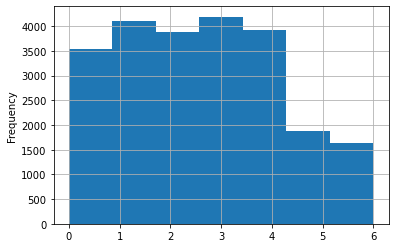

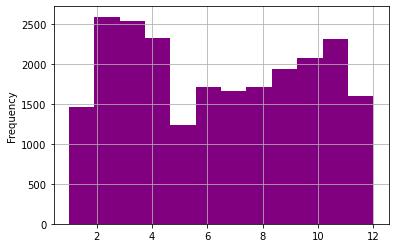

In [38]:
data['day_of_week'].plot(kind='hist', bins=7, grid=True)
plt.show()
data['month_exposition'].plot(kind='hist', color='purple', range=(1, 12), bins=12, grid=True)
plt.show()

Стоит рассмотреть и графики дня и месяца публикации объявлений о продаже объектов недвижимости. Так, наибольшая активность приходится на будние дни (первый график) и почти вдвое меньше количество объявлений приходится на выходные дни.

Видна тенденция и по увеличению количества объявлений в зависимости от месяца публикации. Так, например, меньше всего люди размещают объявления о продаже в январе и в мае (первый и пятый месяцы), что может быть связано с тем, что люди начинают отдыхать и рабочее время заканчивается (январь), а также с тем, что заканчивается учебный год и семьи отправляются в отдых в мае / начале июня после окончания учебного года своих детей (май).

<a name='research'></a>
## 5. Исследования
[Вернуться во Введение](#introduction)

<a name='research_one'></a>
### 5. 1. Исследование 1: Как быстро продавались квартиры

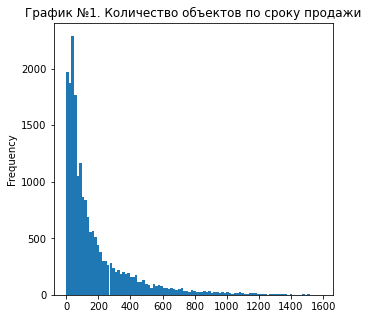

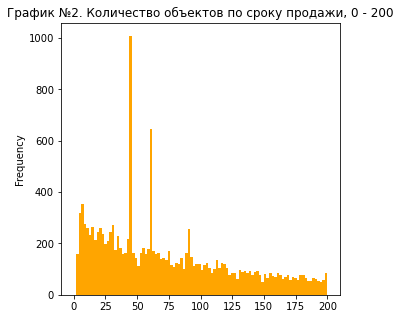

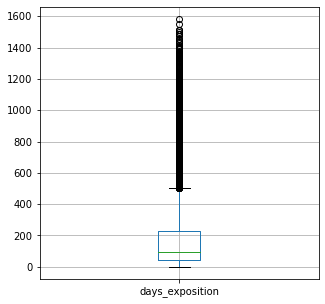

'Среднее значение: 179.45324636526587'

'Медианное значение: 95.0'

'Количество объектов со сроком продажи до 200 дней: 14377'

'Количество объектов со сроком продажи вплоть до года: 17137'

In [39]:
data['days_exposition'].plot(kind='hist',
                             bins=100,
                             figsize=(5, 5),
                             title='График №1. Количество объектов по сроку продажи')
plt.show()
data['days_exposition'].plot(kind='hist',
                             bins=100,
                             figsize=(5, 5),
                             range=(0, 200), 
                             color='orange',
                             title='График №2. Количество объектов по сроку продажи, 0 - 200')
plt.show()
data.boxplot(column='days_exposition', figsize=(5, 5))
plt.show()

display("Среднее значение: {}".format(data['days_exposition'].mean()))
display("Медианное значение: {}".format(data['days_exposition'].median()))
display("Количество объектов со сроком продажи до 200 дней: {}".format(data[data['days_exposition'] < 200]['days_exposition'].count()))
display("Количество объектов со сроком продажи вплоть до года: {}".format(data[data['days_exposition'] <= 365]['days_exposition'].count()))

Медианное значение количества дней со дня публикации и до продажи объекта недвижимости составляет 95 Среднее значение достигает 180 дня. Такая разница в медианном и среднем значении обуславливается наличием отдельных высоких значений, когда время на совершение может достигать и 1500 дней. 

На графике №1 можно заметить, что большинство объектов недвижимости продается за первые 200 дней со дня публикации. Причем на такие объекты приходится порядка 61,9% от общего числа. В течение года после публикации объявления продается уже порядка 73,9% всех объявлений. Пиковые значения приходятся на 45 и 60 дней со дня публикации, что можно увидеть на графике №2.

Анализируя график №3 (диаграмма размаха) можно сказать о том, что продажа квартиры в течение 45 дней и меньше со дня публикации - это быстрая продажа. Необычно долгая продажа квартиры начинается со срока в 500 дней и может достигать 1500 дней.

**Какие факторы больше всего влияют на общую стоимость объекта?**

**Категория "общая площадь" ('total_area')**
<a name='tarea_price'></a>

**Гипотеза 1**: цена зависит от общей площади объекта

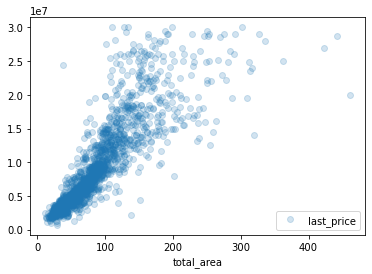

'Коэффициент корреляции между общей площадью и ценой: 0.86'

In [40]:
tarea_df = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()

tarea_df.plot(x='total_area', y='last_price', style='o', alpha=0.2)
plt.show()

display("Коэффициент корреляции между общей площадью и ценой: {}".format(tarea_df['total_area'].corr(tarea_df['last_price']).round(2)))

Поскольку значения могут сильно разниться друг между другом именно касательно таких параметров объектов, как общая площадь и цена, поэтому, можно взять медианные значения цен объектов по размеру общей площади квартир. И далее уже на полученном датафрейме построить график рассеяния и определить коэффициент корреляции между рассматриваемыми показателями - общая площадь и цена.

На диаграмма рассеяния можно увидеть взаимосвязь между ценой и общей площадью. Однако по мере увеличения общей площадью объекта недвижимости разброс значений также меняется. О высокой степени взаимосвязи двух параметров говорит также коэффициент корреляции, который между двумя величинами составляет 0.86.

**Вывод**: гипотеза подтверждена, коэффициент корреляции составляет 0,86

**Категория "жилая площадь" ('living_area')**
<a name='larea_price'></a>

**Гипотеза 2**: цена зависит от жилой площади объекта

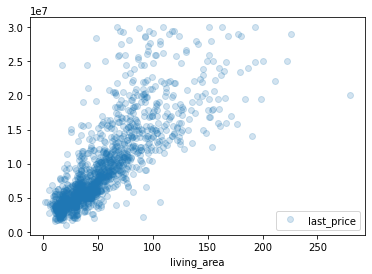

'Коэффициент корреляции между жилой площадью и медианной ценой: 0.8201706503313135'

In [41]:
larea_df = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()

larea_df.plot(x='living_area', y='last_price', style='o', alpha=0.2)
plt.show()

display("Коэффициент корреляции между жилой площадью и медианной ценой: {}".format(larea_df['living_area'].corr(larea_df['last_price'])))

Создан отдельный датафрейм с медианными значения цены по размеру жилой площади, так как в таком случае снижается влияние сильно разрозненных значений.

На графике можно увидеть также относительно высокую зависимость между жилой площадью и ценой. Тем не менее, она чуть менее выражена, чем в графике зависимости между общей площадью и ценой, поскольку разброс значений больше. Относительно высокая степень взаимосвязи также объявсняется и коэффициентом корреляции, равным 0,82.

**Вывод**: гипотеза подтверждена, коэффициент корреляции составляет 0,82

**Категория "площадь кухни" ('kitchen_area')**
<a name='karea_price'></a>

**Гипотеза 3**: цена зависит от площади кухни

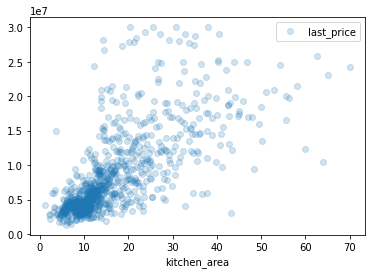

'Коэффициент корреляции между площадью кухни и медианной ценой: 0.7108222345389962'

In [42]:
karea_df = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()

karea_df = karea_df[karea_df['kitchen_area'] < 80]

karea_df.plot(x='kitchen_area', y='last_price', style='o', alpha=0.2)
plt.show()

display("Коэффициент корреляции между площадью кухни и медианной ценой: {}".format(karea_df['kitchen_area'].corr(karea_df['last_price'])))

Для снижения возможного влияния разрозненных значений на полученные результаты взяты медианные значения цены по площади кухни.

По диаграмме рассеяния, а также по коэффициенту корреляции между двумя параметрами - ценой и площадью кухни - можно заметить лишь умеренный характер взаимозависимости двух параметров. Об этом также говорит и коэффициент корреляции, который составляет 0,71.

**Вывод**: гипотеза частично подтверждена, коэффициент корреляции - 0,71

**Категория "количество комнат" ('rooms')**
<a name='rooms_area'></a>

**Гипотеза 4**: количество комнат влияет на цену объекта недвижимости

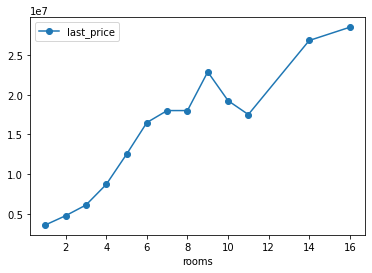

'Коэффициенты корреляции между количеством комнат и медианной ценой: 0.951323968836513'

In [43]:
rooms_df = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()

rooms_df.plot(x='rooms', y='last_price', style='o-')
plt.show()

display("Коэффициенты корреляции между количеством комнат и медианной ценой: {}".format(rooms_df['last_price'].corr(rooms_df['rooms'])))

Взяв медианные значения цены по количеству комнат в квартире, коэффициент корреляции достиг уровня в 0,95, что говорит о прямой взаимозависимости двух параметров. Столь высокая корреляция между двумя рассматриваемыми параметрами видна и на графике.

**Вывод**: гипотеза подтверждена, коэффициент корреляции - 0,95

**Категория "типа этажа" ('floor_type')**
<a name='ftype_price'></a>

**Гипотеза 5**: тип этажа влияет на цену объекта недвижимости

,last_price,floor_type
7861,30000000,другой
15580,30000000,другой
7518,30000000,другой
18787,30000000,другой
22872,30000000,последний
3219,30000000,другой
21608,30000000,другой
6277,30000000,другой
10160,30000000,другой
6363,30000000,другой


,floor_type,max,min,count,mean,median
,,last_price,last_price,last_price,last_price,last_price
0,другой,30000000,450000,17043,5.976384e+06,4800000
1,первый,29500000,430000,2879,4.554592e+06,3900000
2,последний,30000000,430000,3244,5.585847e+06,4287500


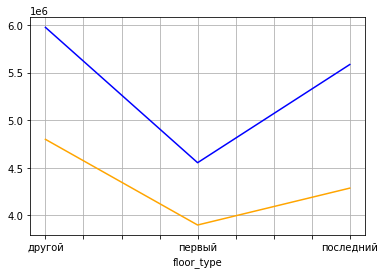

In [44]:
# Топ-20 объектов по цене объекта с указанием типа этажа
display(data.sort_values(by='last_price', ascending=False).head(20)[['last_price', 'floor_type']])

# График со средним и медианным значением цены по типу этажа
ftype_df = data.pivot_table(index='floor_type', values='last_price', aggfunc=['max', 'min', 'count', 'mean', 'median']).reset_index()
display(ftype_df)

ax = ftype_df.plot(x='floor_type', y='mean', grid=True, color='blue', legend=False)
ftype_df.plot(x='floor_type', y='median', grid=True, ax=ax, color='orange', legend=False)
plt.show()

По данным можно увидеть, что количество объектов (что также следовало из предшествующего предварительного анализа параметров) с типом этажа "другой" значительно превышает число объектов с типами этажей "первый" и "последний". 

Также можно заметить на данных датафрейма и на графике (синяя линия - "среднее значение", оранжевая линия - "медианное значение"), что цена квартир с типом этажа "другой" выше, чем на остальные: медианная цена - 4 800 000 для квартир с типом этажа "другой", 3 900 000 - для "первый" и 4 300 000 - для "последний". А на объекты с типом этажа "первый" уровень цен ниже, чем на "другой" и на "последний". Тем не менее, корреляция между ценой и типом этажа хоть и имеется, однако она не столь выражена, что объясняется похожими максимальными и минимальными значениями цены по каждому из типов этажа: минимальная цена для квартир с типом этажей "первый" и "последний" - 430 000, а для "другой" - 450 000; максимальная же цена для квартир с типом этажей "другой" и "последний" - 30 000 000, а для "первый" ниже, но незначительно - 29 500 000.

**Вывод**: гипотеза частично подтверждена, максимальные и минимальные значения цены почти совпадают по типам этажей, однако среднее и медианное значение цены объектов с типом этажа "другой" выше остальные, а объектов с типом этажа "последний" - выше чем с "первый".

**Категория "дата размещения" ('year_exposition', 'month_exposition', 'day_of_week')**
<a name='date_price'></a>

**Гипотеза 6**: дата размещения влияет на цену объекта недвижимости

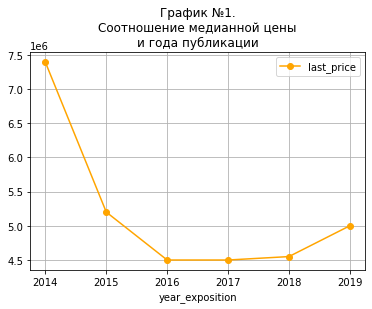

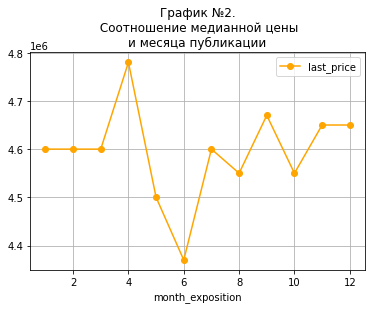

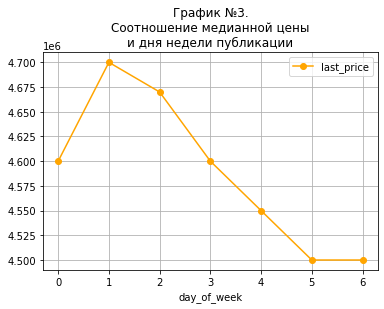

In [45]:
# График со средним и медианным значением цены квартир по годам
year_median_df = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index()
year_median_df.plot(
    x='year_exposition',
    y='last_price',
    style='o-',
    grid=True,
    color='orange',
    title='График №1.\nСоотношение медианной цены\nи года публикации'
)

# График со средним и медианным значением цены квартир по месяцам
month_median_df = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()
month_median_df.plot(
    x='month_exposition', 
    y='last_price',
    style='o-',
    grid=True,
    color='orange',
    title='График №2.\n Соотношение медианной цены\nи месяца публикации'
)
plt.show()

# График со средним и медианным значением цены квартир по дням недели
day_week_median_df = data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').reset_index()
day_week_median_df.plot(
    x='day_of_week',
    y='last_price',
    style='o-',
    grid=True,
    color='orange',
    title='График №3.\nСоотношение медианной цены\nи дня недели публикации'
)
plt.show()

На экран выведено три графика: график зависимости года публикации и цены, график зависимости месяца и цены, а также дней недели и цены.

На графике №1 можно увидеть некоторую закономерность между зависимостью цены и годом публикации. Так, значения медианной цены с годами стагнировали (с примерно 7,3 млн до 4,5 млн), хотя в 2018 и 2019 году начали незначительно повышаться (до 5 млн).

Можно заметить и закономерность на графике №2. Можно одназначно сказать, что минимальная цена объектов приходится на объекты, опубликованные в июне. Более высокие значения приходятся на апрель.

На графике №3 изображена заивисимость медианного значения цены по дням недели. Так, отчетливо можно заметить снижение медианной цены с четверга. Наиболее высокие значения приходятся на вторник и среду (4,7 млн).  Минимальные значения приходятся на выходные дни (4,5 млн(.

**Вывод**: гипотеза частично подтверждена, можно выявить некоторые закономерности, например, что объекты недвижимости, опубликованные в выходные дни ниже, чем в будние дни; с годами уровень цен на недвижимость снижался и стагнировал, но только в 2019 году он незначительно вырос; более дешевые квартиры выставляются на продажу в июне. Тем не менее, изменение цен по месяцам и дням недели не столь сильно отображено. Сильнее видна разнится по годам.

<a name='research_two'></a>
### 5. 2. Исследование 2: Подсчет средней цены квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью за квадратный метр

In [46]:
# Создание и соединение двух датафреймов: один - с количеством объявлений по убыванию, другой - с ценой за м2
loc_price_df = data.pivot_table(index='locality_name', values='meter_price').reset_index()
loc_count_df = data['locality_name'].value_counts().reset_index()
loc_count_df.columns = ['locality_name', 'count'] # Переименовывание столбцов

# Соединение двух датафреймов
loc_count_price_df = loc_count_df.merge(loc_price_df, on='locality_name', how='left')[:10]
loc_count_price_df['meter_price'] = loc_count_price_df['meter_price'].astype('int64')
display(loc_count_price_df[:10]) # Отображение первых десяти населенных пунктов по числу объявлений

# Отображение населенных пунктов с максимальной и минимальной ценой за м2
display(loc_count_price_df[loc_count_price_df['meter_price'] == loc_count_price_df['meter_price'].max()])
display(loc_count_price_df[loc_count_price_df['meter_price'] == loc_count_price_df['meter_price'].min()])

,locality_name,count,meter_price
0,Санкт-Петербург,15297,110548
1,Мурино,586,86041
2,Кудрово,469,95261
3,Шушары,439,78551
4,Всеволожск,397,68719
5,Пушкин,364,103153
6,Колпино,336,75352
7,Парголово,326,90205
8,Гатчина,307,68746
9,Выборг,235,58238


,locality_name,count,meter_price
0,Санкт-Петербург,15297,110548


,locality_name,count,meter_price
9,Выборг,235,58238


Наивысшую позицию по уровню цены на один квадратный метр среди 10 самых популярных местоположений продажи квартиры по колчиеству объявлений занимает Санкт-Петербург со средней ценой за квадратный метр в 110 548 рублей. Стоит упомянуть и тот факт, что количество объявлений о продаже квартиры в Санкт-Петербурге значительно превышает остальные населенные пункты: показатель первого места превышает второго в 27 раз.

Максимальная цена за м2 среди топ-10 населенных пунктов по количеству объявлений о продаже занимает культурная столица - Санкт-Петербург - с показателем в 110 548 рублей. Наименьшее значение по данному показателю занимает населенный пункт Выборг с ценой за м2 равной 58 238 рублей.

**Выводы**:
- Наибольшая цена за 1 м2 в Санкт-Петербурге - 110 548 рублей.
- Наименьшая цена за 1 м2 в Старополье - 58 238 рублей.

<a name='research_three'></a>
### 5. 3. Исследование 3. Вычисление средней цены каждого километра. Описание зависимости между стоимостью объектов и расстояния до центра города.

,cityCenters_km,last_price
0,0,11318667
1,1,12042591
2,2,11128244
3,3,9894730
4,4,10372528


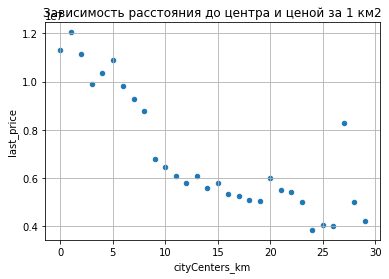

Расстояние до центра с наивысшей ценой за м2:


,cityCenters_km,last_price
1,1,12042591


'Коэффициент корреляции между расстоянием до центра Питера и ценой за 1 м2: -0.84'

In [47]:
speter_km_df = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_km', values='last_price').reset_index()
speter_km_df['last_price'] = speter_km_df['last_price'].round()
speter_km_df = speter_km_df.astype('int64')
display(speter_km_df.head())

speter_km_df.plot(kind='scatter',
                  x='cityCenters_km', 
                  y='last_price', 
                  grid=True, 
                  title='Зависимость расстояния до центра и ценой за 1 км2')
plt.show()

print("Расстояние до центра с наивысшей ценой за м2:")
display(speter_km_df[speter_km_df['last_price'] == speter_km_df['last_price'].max()])
display("Коэффициент корреляции между расстоянием до центра Питера и ценой за 1 м2: {}".format(speter_km_df['cityCenters_km'].corr(speter_km_df['last_price']).round(2)))

Можно заметить несколько тенденций за счет создания сводной таблицы с расстоянием до центра города в км и средней ценой объекта недвижимости. Так, наиболее высокая цена приходится на объекты, которые находится вблизи центра города (до 10 км), что отчетливо можно видеть на графике. Расстояние до центра города в км с наивысшей ценой - первый километр с ценой в 12 042 591 рублей.

Коэффициент корреляции между расстояние до центра города и ценой за 1 м2 по Санкт-Петербургу составляет "-0,84".  Ввиду того, что наблюдается отрицательный коэффициент корреляции и можно сделать вывод о том, что две переменные - расстояние до центра города и средняя цена за объект недвижимости - находятся в обратной зависимости. Это означает, что с увеличением одного параметра уменьшается значение другого. Следовательно, наиболее высокие значения средней цены (высокий первый параметр) приходятся на наименьшее расстояние до центра Санкт-Петербурга (низкий второй параметр). Это работает и в обратную сторону.

<a name='conclusion'></a>
## 6. Общий вывод
[Вернуться во Введение](#introduction)

Было проведено исследование по данных об объектах недвижимости выставленных на продажу в Санкт-Петербурге и близлежащих населенных пунктах. Задача состояла в следующем: необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Предполагалась постановка гипотез касательно зависимости характеристик объектов недвижимости и цены, а необходимо было провести дополнительные исследования: 1) как быстро продавались квартиры, 2) выделение топ-10 населенных пунктов по количеству объявлений о продаже квартиры и расчет цены за м2 в них, 3) определение зависимостм между расстоянием до центра Санкт-Петербурга и средней ценой за объекты недвижимости.

**Исследование №1: Как быстро продавались квартиры**
- Большая часть объектов недвижимости продавались в течение 200 дней со дня публикации объявления. На этот промежуток приходится  14 225 проданных объектов, что составляет 61,9% от общего числа продаваемых квартир;
- В течение первого года было продано уже 73,9% всех объектов недвижимости (16 971 квартир);
- Медианное значение срока продажи квартиры - 95 дней;

[Код и графики исследования №1](#research_one)

**Вывод**: Быстрая продажа квартиры осуществляется в течение 45 дней со дня публикации, а необычно долгая продажа квартиры начинается со срока в 500 дней и может достигать значения в более чем 1500 дней.

Перед проведением исследования касательно определения зависимости между характеристиками объектов недвижимости и их цены были поставлены несколько гипотез:
- Гипотеза 1: показатель общей площади влияет на цену квартиры 
- Гипотеза 2: показатель жилой площади влияет на цену квартиры
- Гипотеза 3: показатель площади кухни влияет на цену квартиры
- Гипотеза 4: количество комнат влияет на цену квартиры
- Гипотеза 5: этаж, на котором расположена квартира (первый, другой, последний), влияет на цену квартиры
- Гипотеза 6: дата размещения (день, месяц, год) влияет на цену квартиры

В результате исследования были выявлены некоторые зависимости.

**Гипотеза 1 подтверждена:** определена высокая зависимость между ценой и общей площадью

[Код и график по гипотезе 1](#tarea_price)

**Вывод**: поскольку коэффициент корреляции не стремится к единице, следовательно, полагаться только на этот параметр не стоит, однако, он все равно играет высокую роль в определении цены объекта недвижимости.

**Гипотеза 2 частично подтверждена:** определена довольно высокая зависимость между ценой и жилой площадью

[Код и график по гипотезе 2](#larea_price)

**Вывод**: коэффициент корреляции двух параметров не стремится к единице, следовательно, возможно влияние и других характеристик, что необходимо иметь в виду при определении цены объекта недвижимости. Тем не менее, зависимость жилой площади и цены довольно высока.

**Гипотеза 3 частично подтверждена**: зависимость между площадью кухни и ценой имеет умеренный характер

[Код и график по гипотезе 3](#karea_price)

- Необходимо упомянуть, что показатель площади кухни ограничен 80 м2 для снижения влияния разрозненных значений на конечном показателе цены квартиры

**Вывод**: коэффициент корреляции имеет умеренный характер, следовательно, возможно влияние и других факторов, однако, немаловажную роль на конечную цену объекта играет и площадь кухни.

**Гипотеза 4 подтверждена**: наблюдается высокая зависимость между количеством комнат и ценой квартиры

[Код и график по гипотезе 4](#rooms_price)

- Для определения более точной зависимости между двумя параметрами взяты медианные значения цены по площади квартиры
- Коэффициент корреляции между количеством комнат и ценой квартиры составляет 0,95

**Вывод**: крайне высокая зависимость наблюдается между количеством комнат и ценой квартиры, ввиду чего можно полагаться на определение цены объекта недвижимости по количеству комнат в квартире

**Гипотеза 5 частично подтверждена:** замечены некоторые закономерности между типом этажа и ценой квартир

[Код и график по гипотезе 5](#ftype_price)

- Максимальные и минимальные значения цены по типам этажей почти совпадают: минимальная цена для квартир с типом этажа "другой" - 450 000, "первый" - 430 000, "последний" - 430 000; максимальная цена для "другой" - 30 000 000, "первый" - 30 000 000, "последний" - 29 500 000.
- Среднее и медианное значение цены объектов с типом этажа "другой" - 5 976 384 и 4 800 000 соответственно - выше остальных, а значения объектов с типом этажа "последний", 5 585 847 и 4 287 500 соответственно, - выше чем с "первый" - 4554 592 и 3 900 000 соответственно.

Рекомендация: поскольку имеются как высокие, так и низкие значения по каждому из типов этажей (хотя средние и медианные могут иметь определенные закономерности), поэтому я бы не рекомендовал наделять большим весом данный параметр при определении цены квартиры

**Гипотеза 6 частично подтверждена:** наблюдаются небольшие закономерности в даты размещения и цены квартир

[Код и график по гипотезе 6](#date_price)

- Медианное значение цены по годам с 2015 года начало стагнировать (снизилось с более 7 млн до почти 4,5 млн) и лишь в 2018 и 2019 годах стало немного повышаться - до 5 млн.
- Медианное значение цены по месяцам подвержено сильным колебаниям. Так, наибольшее значение приходится на апрель с показателем в 4 800 000 рублей, а наименьшее приходится на июнь с 4 400 000. Тем не менее, отклонение не столько велико по месяцам
- По дням недели медианное значение цены меняется лишь незначительно. Наибольшее значение, 4 700 000 рублей, приходится на вторник и среду. Наименьшее значение, около 4 500 000 - на выходные дни. В целом в будние дни цена квратир чуть выше, чем в выходные дни, однако она незначительна.

**Вывод**: гипотеза частично подтверждена, можно выявить некоторые закономерности, например, что объекты недвижимости, опубликованные в выходные дни ниже, чем в будние дни; с годами уровень цен на недвижимость снижался и стагнировал, но только в 2019 году он незначительно вырос; более дешевые квартиры выставляются на продажу в июне. Тем не менее, сильная разница в цене объектах в зависимости от даты размещения сильно наблюдается лишь по годам размещения. В иных случаях разница незначительна, поэтому придавать вес данным закономерностям не рекомендуется.

**Исследование №2: Необходимо посчитать среднюю цену 1 м2 в 10 населенных пунктах с наибольшим числом объявлений, выделить населенные пункты с самой высокой и низкой стоимостью м2.**

[Код и график исследования №2](#research_two)

- Наибольшая цена за 1 м2 в Санкт-Петерубрге - 110 548 рублей.
- Наименьшая цена за 1 м2 в Выборге - 58 238 рублей.

Вывод: Количество объявлений в Санкт-Петербурге значительно превышает остальные населенные пункты (в 27 раз больше второго по числу объявлений населенного пункта, Мурино), а цена за 1 м2 составляет 115 548 рублей. Наименьшая цена наблюдается в Выборге - 58 328 рублей.

**Исследование №3: Необходимо выделить квартиры в Санкт-Петербурге и вычислть среднюю цену каждого километра, а также объяснить как стоимость объектов зависит от расстояния до центра города.**

[Код и график исследования №3](#research_three)

- Наиболее высокая цена приходится на объекты, которые находится вблизи центра города, до 10 км;
- Расстояние до центра Санкт-Петербурга с наивысшей ценой - первый километр с ценой в 12 042 591 рублей;
- Коэффициент корреляции между расстоянием до центра города и ценой по всей выборке составляет "-0,84", что говорит о довольно высокой взаимозависимости параметров;
- Отрицательный коэффициент корреляции свидетельствует об обратной зависимости одной переменной к другой. То есть, при увеличении расстояния до центра города уровень цен на объекты недвижимости снижается и наоборот.

**Вывод**: корреляция между расстоянием до центра города и ценой объекта довольно высока и составляет "-0,84".